In [1]:
#Library required for K means Clustering model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
#sklearn 
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale # for scaling the data
import sklearn.metrics as sm # for evaluating the model
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
#Define the Parameters for the Visualization
%matplotlib inline 
rcParams["figure.figsize"] =20,10

In [3]:
#Read & Load Dataset
data = pd.read_csv(r"F:\my projects\Users\datasets\bank-full.csv",delimiter=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
#Load and scale the Dataset
iris = datasets.load_iris()
#scale the data
data = scale(iris.data) # scale the iris data
target = pd.DataFrame(iris.target) # define the target 
variable_names = iris.feature_names
data[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [5]:
clustering = KMeans(n_clusters=3,random_state=5)
#fit the dataset
clustering.fit(data)


E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=5)

In [6]:
#Build the Cluster Model and model the output
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ["age","balance","duration","pdays" ]
target.columns =["y"]

### Plot the Model Output using Matplotlib

Text(0.5, 1.0, 'K means Classifcation')

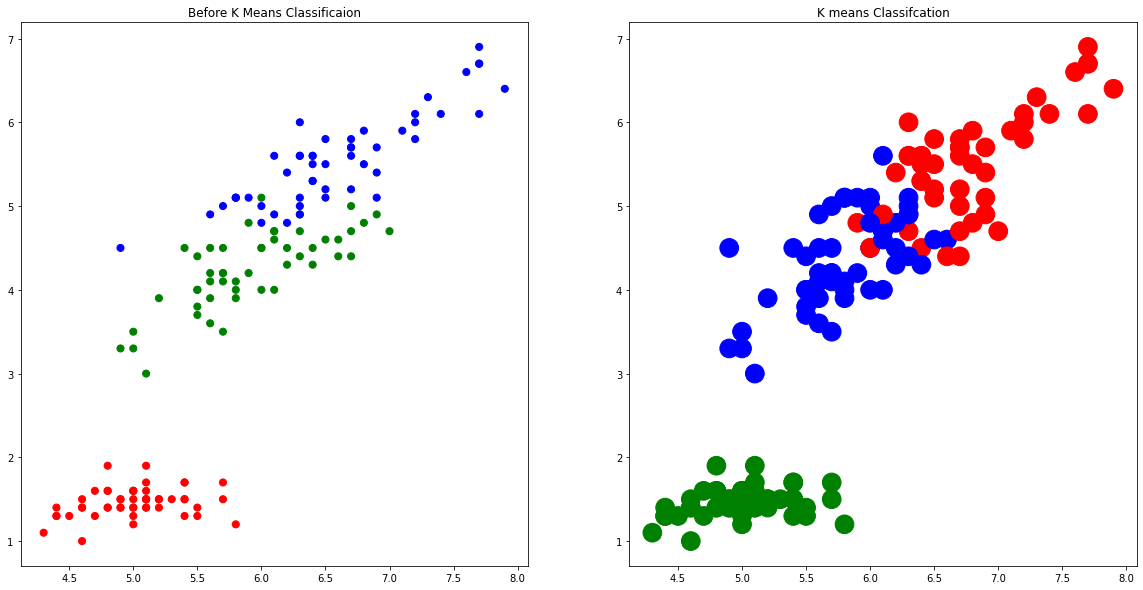

In [7]:
# Plotting between age and duration
colors = np.array(["Red","Green","Blue"])
plt.subplot(1,2,1)
plt.scatter(x=iris_df["age"] ,y= iris_df["duration"],c = colors[iris.target],s=50)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=iris_df["age"] ,y= iris_df["duration"],c = colors[clustering.labels_],s=350)
plt.title("K means Classifcation")

Text(0.5, 1.0, 'K means Classifcation')

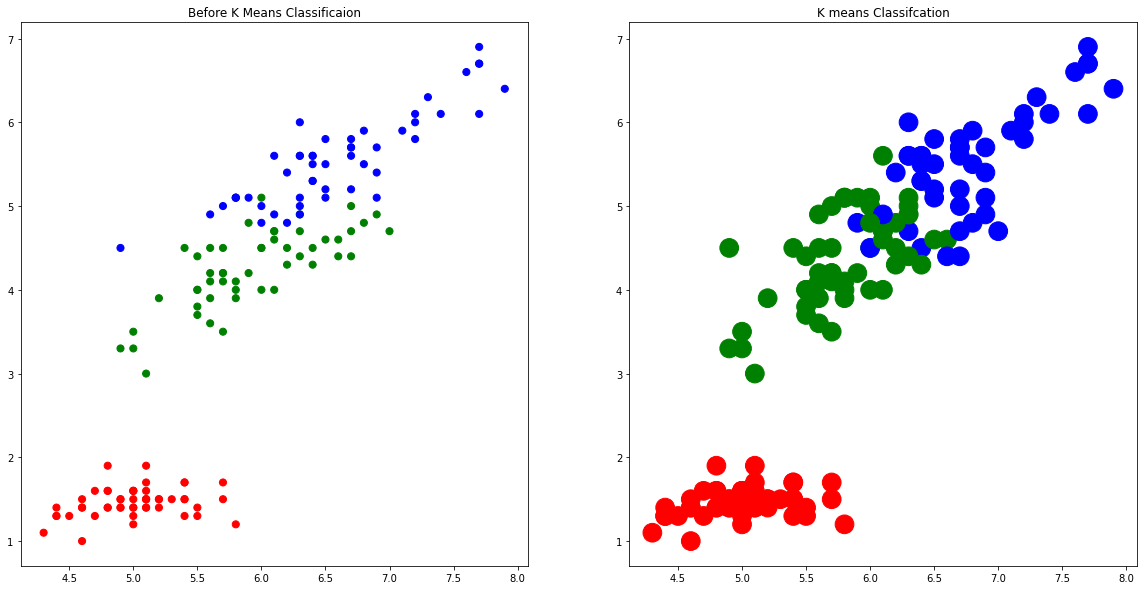

In [8]:
#ploting between age and duration
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
colors = np.array(["Red","Green","Blue"])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.age ,y= iris_df.duration,c = colors[iris.target],s=50)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=iris_df.age ,y= iris_df.duration,c = colors[relabel],s=350)
plt.title("K means Classifcation")

Text(0.5, 1.0, 'K means Classifcation')

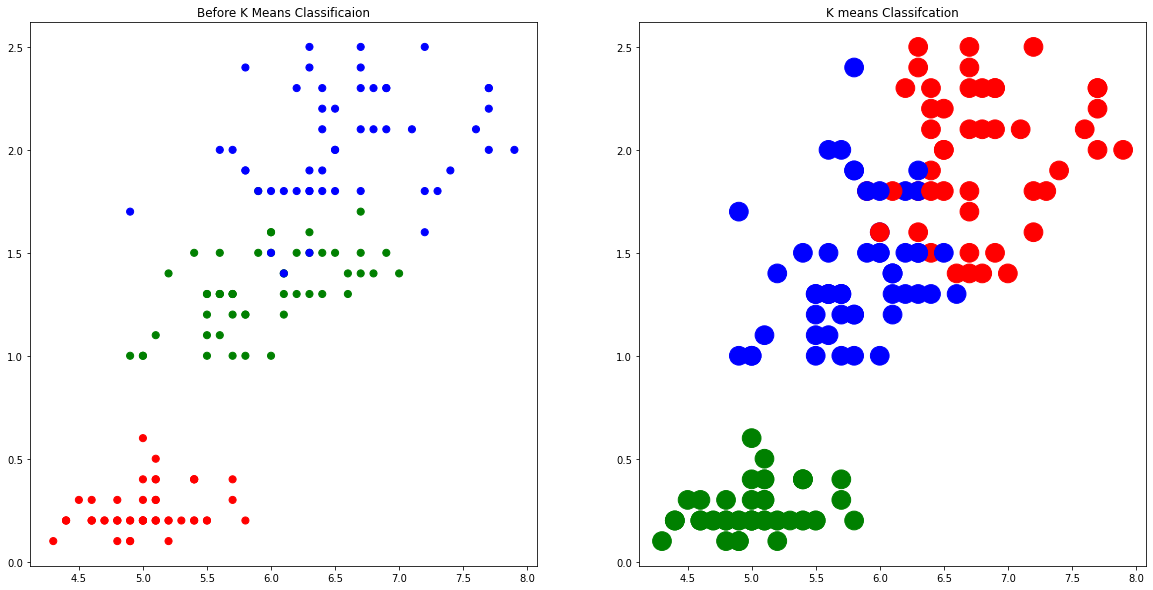

In [9]:
#ploting between age and pdays
plt.subplot(1,2,1)
plt.scatter(x=iris_df["age"] ,y= iris_df["pdays"],c = colors[iris.target],s=50)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=iris_df["age"] ,y= iris_df["pdays"],c = colors[clustering.labels_],s=350)
plt.title("K means Classifcation")

Text(0.5, 1.0, 'K means Classifcation')

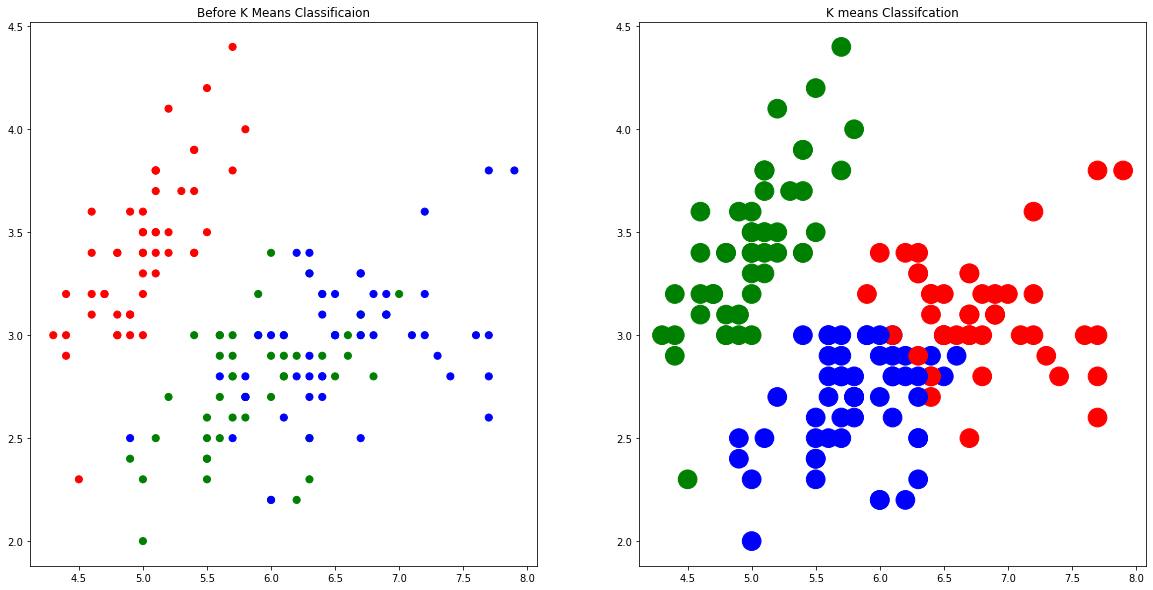

In [10]:
#ploting betweeen age and balance
plt.subplot(1,2,1)
plt.scatter(x=iris_df["age"] ,y= iris_df["balance"],c = colors[iris.target],s=50)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=iris_df["age"] ,y= iris_df["balance"],c = colors[clustering.labels_],s=350)
plt.title("K means Classifcation")

Text(0.5, 1.0, 'K means Classifcation')

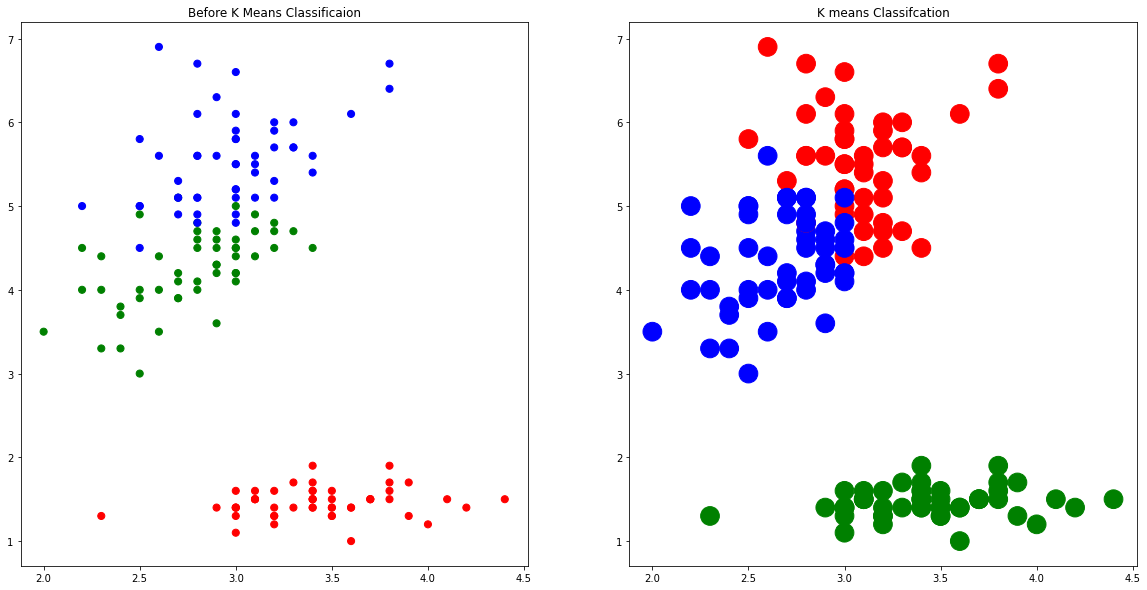

In [11]:
#ploting between balance and duration
plt.subplot(1,2,1)
plt.scatter(x=iris_df["balance"] ,y= iris_df["duration"],c = colors[iris.target],s=50)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=iris_df["balance"] ,y= iris_df["duration"],c = colors[clustering.labels_],s=350)
plt.title("K means Classifcation")

Text(0.5, 1.0, 'K means Classifcation')

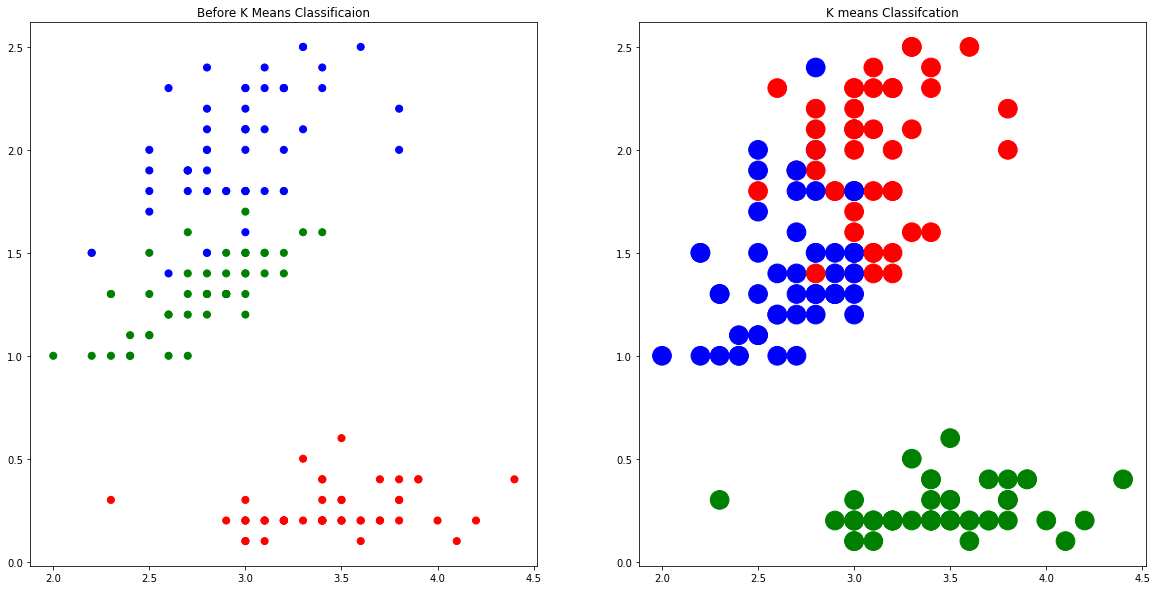

In [12]:
#ploting between balance and pdays
plt.subplot(1,2,1)
plt.scatter(x=iris_df["balance"] ,y= iris_df["pdays"],c = colors[iris.target],s=50)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=iris_df["balance"] ,y= iris_df["pdays"],c = colors[clustering.labels_],s=350)
plt.title("K means Classifcation")